#### Imports

In [5]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Pré-processamento
No meu dataset (Spruce.csv) a única variável que irá necessitar de um pré-processamento é a "Tree_Type":

"Other" -> 0;
"Spruce" -> 1

In [7]:
df = pl.read_csv("Spruce.csv", separator=",")

df = df.with_columns(
    pl.when(pl.col("Tree_Type") == "Other").then(0).otherwise(1).alias("Tree_Type")
)

#### Separação de dados

In [8]:
df = df.sample(shuffle=True, fraction=1)

spruce_label = df["Tree_Type"].to_numpy()
spruce_values = df.drop(["Tree_Type"]).to_numpy()

spruce_values_train, spruce_values_test, spruce_label_train, spruce_label_test = train_test_split(spruce_values, spruce_label, test_size=0.2, random_state=321)

#### Naive Bayes

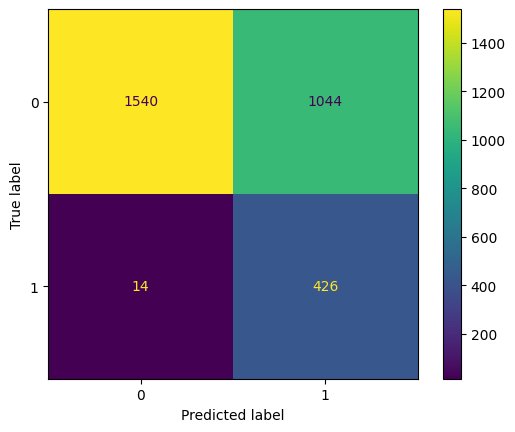

0.44607329842931936


In [17]:
#Naive Bayes gaussiano
nb = GaussianNB()
nb.fit(spruce_values_train, spruce_label_train)
nb.score(spruce_values_test, spruce_label_test) # 0.6623677248677249 ~= 66.2%

#Matriz de confusão
predictions = nb.predict(spruce_values_test)
c_matrix = confusion_matrix(spruce_label_test, predictions, labels=nb.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=nb.classes_)
display.plot()
plt.show()

f1_scoreGNB = f1_score(spruce_label_test, predictions, labels=nb.classes_)
print(f1_scoreGNB)

Matrix de confusão sobre set de teste:

![image.png](./images/ConfusionMatrixGNB.png)

Verdadeiro positivo: 426\
Verdadeiro negativo: 1540\
Falso negativo: 1044\
Falso positivo: 14\
F1 Score: 0.4352

#### Multilayer Perceptron (MLP)

In [ ]:
# Foi utilizado duas camadas ocultas, com 16 neurônios e com função de ativação RELU
# Pois foi pensado como uma boa base de testes
# A camada de saida, porém, usa a função sigmoid, pois como é um classificador binário
# é esperada a probabilidade entre 0 e 1
baseline_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

#
baseline_model.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

history = baseline_model.fit(spruce_values_train,
                    spruce_label_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6894 - loss: 25.3077 - val_accuracy: 0.8397 - val_loss: 2.3612
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.7781 - loss: 3.5191 - val_accuracy: 0.8550 - val_loss: 7.7533
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.7845 - loss: 3.3656 - val_accuracy: 0.2835 - val_loss: 5.7984
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7759 - loss: 3.0204 - val_accuracy: 0.2194 - val_loss: 9.6781
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7735 - loss: 2.7483 - val_accuracy: 0.8554 - val_loss: 2.4028
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7826 - loss: 2.3653 - val_accuracy: 0.8541 - val_loss: 4.6182
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.7867 - loss: 1.9781 - val_accuracy: 0.8426 - val_loss: 1.4758
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.7801 - loss: 1.7825 - v

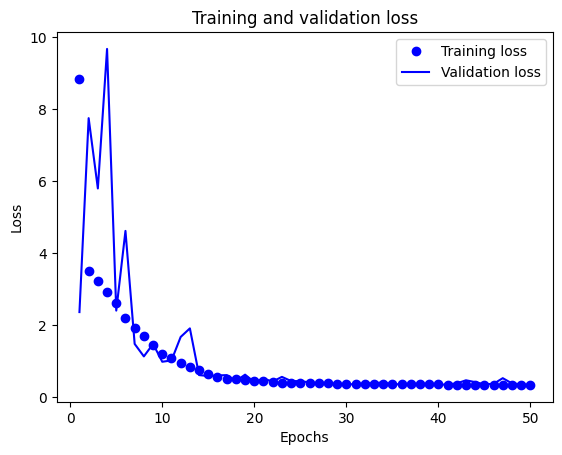

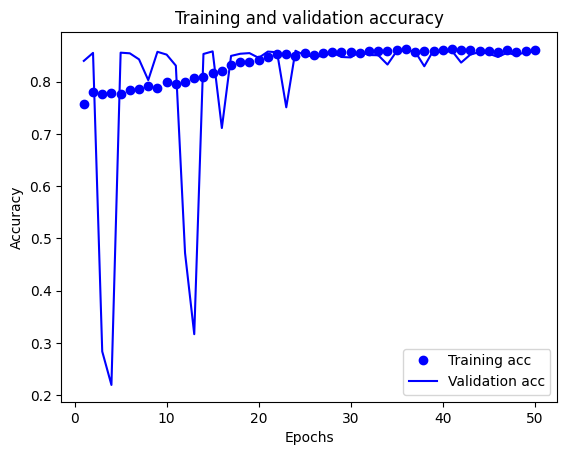

In [21]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:


prediction_mlp = baseline_model.predict(spruce_values_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8628 - loss: 0.3306
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [24]:
print(prediction_mlp)

[[0.06032072]
 [0.12830594]
 [0.02523434]
 ...
 [0.04618692]
 [0.22157955]
 [0.23321337]]
